In [1]:
import os
import string

import re

from tika import parser

# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import numpy as np


from matplotlib.gridspec import GridSpec


In [3]:
import spacy
# from spacy.lang.en import English
# nlp = English()#
nlp = spacy.load('en_core_web_sm')
from spacy.lang.en.stop_words import STOP_WORDS


#### Ideas
- What if we used the terms in the various available glossaries to assess trends across? What if the plots that I show had drop-down menus at the top that allowed users to apply the glossary they are most interested to see the data for? 

#### Load desired PDFs/text files

In [5]:
# base_filepath = '/Users/ryanmcgranaghan/Documents/Helio_ECIP/Documents/'
base_filepath = '../data/'
file_awards_2018 = os.path.join(base_filepath,'ECIP_awards_2018.pdf')
file_awards_2020 = os.path.join(base_filepath,'ECIP_awards_2020.pdf')
file_decadal = os.path.join(base_filepath,'Heliophysics Decadal Survey -- Solar and Space Physics A Science for a Technological Society.pdf')


parsed_2018 = parser.from_file(file_awards_2018)
parsed_2020 = parser.from_file(file_awards_2020)
parsed_decadal = parser.from_file(file_decadal)


2021-11-11 16:14:20,205 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /var/folders/fr/9svwksbd6h115gvfd3t2xrd00000gq/T/tika-server.jar.
2021-11-11 16:14:45,934 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /var/folders/fr/9svwksbd6h115gvfd3t2xrd00000gq/T/tika-server.jar.md5.
2021-11-11 16:14:46,268 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [6]:
parsed_2018.keys()

dict_keys(['metadata', 'content', 'status'])

In [7]:
parsed_2018['metadata']

{'Author': 'Sinyan Whitfield',
 'Comments': '',
 'Company': '',
 'Content-Type': 'application/pdf',
 'Creation-Date': '2019-04-24T23:40:16Z',
 'Keywords': '',
 'Last-Modified': '2019-04-25T13:01:23Z',
 'Last-Save-Date': '2019-04-25T13:01:23Z',
 'SourceModified': 'D:20190424232659',
 'X-Parsed-By': ['org.apache.tika.parser.DefaultParser',
  'org.apache.tika.parser.pdf.PDFParser'],
 'X-TIKA:content_handler': 'ToTextContentHandler',
 'X-TIKA:embedded_depth': '0',
 'X-TIKA:parse_time_millis': '912',
 'access_permission:assemble_document': 'true',
 'access_permission:can_modify': 'true',
 'access_permission:can_print': 'true',
 'access_permission:can_print_degraded': 'true',
 'access_permission:extract_content': 'true',
 'access_permission:extract_for_accessibility': 'true',
 'access_permission:fill_in_form': 'true',
 'access_permission:modify_annotations': 'true',
 'cp:subject': '',
 'created': '2019-04-24T23:40:16Z',
 'creator': 'Sinyan Whitfield',
 'date': '2019-04-25T13:01:23Z',
 'dc:cr

In [8]:
content_2018 = parsed_2018['content']
content_2020 = parsed_2020['content']
content_decadal = parsed_decadal['content']

In [9]:
content_2018

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \nHeliophysics - Early Career Investigator Program \n\nAbstracts of Selected Proposals \n(NNH18ZDA001N-ECIP) \n\n \nBelow are the abstracts of proposals selected for funding for the Heliophysics – Early Career \nInvestigator Program. Principal Investigator (PI) name, institution, and proposal title are also \nincluded. 50 proposals were reviewed in response to this opportunity. On April 1, 2019, 11 \nproposals were selected for funding.  \n\n \n \n\n \nHaihong Che/University of Maryland, College Park  \nElectron Heating and Plasma Emission in the Solar Corona  \n \nNanoflares heating has been recognized as an important process that contributes to the heating of \nthe solar corona, particularly to electron heating in the lower corona. Similar to solar flares, \nnanoflares are also a type of impulsive magnetic reconnection (MR), typically with a strong \nguide f

In [9]:
# Get the names of the 2018 recipients
instances_2018 = []
instances_2018 = instances_2018 + [m.start() for m in re.finditer('\n \n\n  \n', content_2018)]
instances_2018 = instances_2018 + [m.start() for m in re.finditer('\n\n \n \n', content_2018)]
instances_2018

names_2018 = []
for i in instances_2018:
    names_2018 = names_2018+[content_2018[i:i+content_2018[i:i+30].find('/')].replace('\n','').replace(' ','')]
#     print(content_2018[i:i+content_2018[i:i+30].find('/') ].strip('\n'))
names_2018                            

['McArthurJones',
 'HaihongChe',
 'MichaelHartinger',
 'SethDorfman',
 'WeichaoTu',
 'ChristinaKay',
 'MariaKazachenko',
 'XiangningChu',
 'KristopherKlein',
 'RalucaIlie',
 'RekaWinslow']

In [10]:
# Get the names of the 2020 recipients
instances_2020 = []
instances_2020 = instances_2020 + [m.start() for m in re.finditer('\n \n\n  \n', content_2020)]
instances_2020 = instances_2020 + [m.start() for m in re.finditer('\n\n \n \n', content_2020)]
instances_2020

names_2020 = []
for i in instances_2020:
    names_2020 = names_2020+[content_2020[i:i+content_2020[i:i+30].find('/')].replace('\n','').replace(' ','')]
#     print(content_2020[i:i+content_2020[i:i+30].find('/') ].strip('\n'))
names_2020 

['NadaAl-Haddad', 'RyanMcGranaghan']

#### Work with the full text data and analyze word frequency - Spacy

In [10]:
tokens_2018 = nlp(content_2018)
tokens_2018
































































 
Heliophysics - Early Career Investigator Program 

Abstracts of Selected Proposals 
(NNH18ZDA001N-ECIP) 

 
Below are the abstracts of proposals selected for funding for the Heliophysics – Early Career 
Investigator Program. Principal Investigator (PI) name, institution, and proposal title are also 
included. 50 proposals were reviewed in response to this opportunity. On April 1, 2019, 11 
proposals were selected for funding.  

 
 

 
Haihong Che/University of Maryland, College Park  
Electron Heating and Plasma Emission in the Solar Corona  
 
Nanoflares heating has been recognized as an important process that contributes to the heating of 
the solar corona, particularly to electron heating in the lower corona. Similar to solar flares, 
nanoflares are also a type of impulsive magnetic reconnection (MR), typically with a strong 
guide field. It is still poorly understood how nearly collisionless MRs efficiently transform

In [14]:
tokens_2018
































































 
Heliophysics - Early Career Investigator Program 

Abstracts of Selected Proposals 
(NNH18ZDA001N-ECIP) 

 
Below are the abstracts of proposals selected for funding for the Heliophysics – Early Career 
Investigator Program. Principal Investigator (PI) name, institution, and proposal title are also 
included. 50 proposals were reviewed in response to this opportunity. On April 1, 2019, 11 
proposals were selected for funding.  

 
 

 
Haihong Che/University of Maryland, College Park  
Electron Heating and Plasma Emission in the Solar Corona  
 
Nanoflares heating has been recognized as an important process that contributes to the heating of 
the solar corona, particularly to electron heating in the lower corona. Similar to solar flares, 
nanoflares are also a type of impulsive magnetic reconnection (MR), typically with a strong 
guide field. It is still poorly understood how nearly collisionless MRs efficiently transform

In [12]:
tokens_2020 = nlp(content_2020)
tokens_2020





























































«PI_First_name» «PI_Last_name»/«Linked_Org»


Early Career Investigator Program 
Abstracts of Selected Proposals 

(NNH20ZDA001N-ECIP) 
 
Below are the abstracts of proposals selected for funding for the Early Career 
Investigator program. Principal Investigator (PI) name, institution, and proposal title are 
also included.  54 proposals were received in response to this opportunity.  On December 
3, 2020, 15 proposals were selected for funding. 

 
 
Nada Al-Haddad/University of New Hampshire, Durham 
Investigating the Structure of Coronal Magnetic Eruptions Through 
Comprehensive Data Analysis 
 
- Objectives and Science Questions: 
We propose an investigation on the magnetic structure of coronal magnetic eruptions 
(CMEs) based on a comprehensive data analysis study incorporating in situ 
measurements of magnetic fields and plasma and remote observations. In parallel, we 
will also develop and validate models and techniques

In [36]:
# Removing material at beginning and end of the decadal to reduce amount of text
    # This needs to be done more robustly to remove superfluous text (such as the footers on every page)

print( len(content_decadal) )

content_decadal = content_decadal[content_decadal.index('Preface'):]
print( len(content_decadal) )

content_decadal = content_decadal[:content_decadal.index('Appendixes')]

print( len(content_decadal) )



1479368
1459778
1090663


In [37]:
nlp.max_length = 1100000
tokens_decadal = nlp(content_decadal)
tokens_decadal

Preface

Strategic planning activities within NASA’s Science Mission Directorate (SMD) and several National 
Science Foundation (NSF) divisions draw heavily on reports issued by the National Research Council 
(NRC), particularly those from the Space Studies Board (SSB). Principal among these SSB inputs is identifi-
cation of priority science and missions and facilities in the decadal science strategy surveys. The first true 
decadal strategy for the field of solar and space physics, The Sun to the Earth—and Beyond: A Decadal 
Research Strategy in Solar and Space Physics, was published in 2003. That comprehensive study reviewed 
relevant research and applications activities, listed the key science questions, and recommended specific 
spacecraft missions and ground-based facilities and programs for the period 2003-2012. Supplemented by 
several subsequent SSB studies—for example, A Performance Assessment of NASA’s Heliophysics Program 
(2009); Distributed Arrays of Small Instruments for 

In [38]:

tokens = [w.text.lower() for w in tokens_2018]
# convert to lower case
tokens = [w.lower() for w in tokens]
# remove punctuation from each word

table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
words_2018 = [word for word in stripped if word.isalpha()]
# filter out stop words
# stop_words = set(stopwords.words('english'))
words_2018_filter = [w for w in words_2018 if nlp.vocab[w].is_stop == False]



tokens = [w.text.lower() for w in tokens_2020]
# convert to lower case
tokens = [w.lower() for w in tokens]
# remove punctuation from each word

table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
words_2020 = [word for word in stripped if word.isalpha()]
# filter out stop words
# stop_words = set(stopwords.words('english'))
words_2020_filter = [w for w in words_2020 if nlp.vocab[w].is_stop == False]


tokens = [w.text.lower() for w in tokens_decadal]
# convert to lower case
tokens = [w.lower() for w in tokens]
# remove punctuation from each word

table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
words_decadal = [word for word in stripped if word.isalpha()]
# filter out stop words
# stop_words = set(stopwords.words('english'))
words_decadal_filter = [w for w in words_decadal if nlp.vocab[w].is_stop == False]


                              
                     
                     


#### Work with the full text data and analyze word frequency - NLTK

In [39]:
tokens = word_tokenize(content_2018)
# convert to lower case
tokens = [w.lower() for w in tokens]
# remove punctuation from each word

table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
words_2018 = [word for word in stripped if word.isalpha()]
# filter out stop words
stop_words = set(stopwords.words('english'))
words_2018 = [w for w in words_2018 if not w in stop_words]

tokens = word_tokenize(content_2020)
# convert to lower case
tokens = [w.lower() for w in tokens]
# remove punctuation from each word
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
words_2020 = [word for word in stripped if word.isalpha()]
# filter out stop words
words_2020 = [w for w in words_2020 if not w in stop_words]



NameError: name 'word_tokenize' is not defined

In [40]:
# Functions pulled from: https://programminghistorian.org/en/lessons/counting-frequencies
def wordListToFreqDict(wordlist):
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(zip(wordlist,wordfreq))

def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

def count_occurrences_words(sortedfreqdict):
    occurrences = [w[0] for w in sortedfreqdict]
    words = [w[1] for w in sortedfreqdict]
    return occurrences, words


In [41]:
freqdict_2018 = wordListToFreqDict(words_2018_filter)
sortedfreqdict_2018 = sortFreqDict(freqdict_2018)


freqdict_2020 = wordListToFreqDict(words_2020_filter)
sortedfreqdict_2020 = sortFreqDict(freqdict_2020)


freqdict_decadal = wordListToFreqDict(words_decadal_filter)
sortedfreqdict_decadal = sortFreqDict(freqdict_decadal)



In [42]:

occurrences_2018, words_2018 = count_occurrences_words(sortedfreqdict_2018)
occurrences_2020, words_2020 = count_occurrences_words(sortedfreqdict_2020)
occurrences_decadal, words_decadal = count_occurrences_words(sortedfreqdict_decadal)


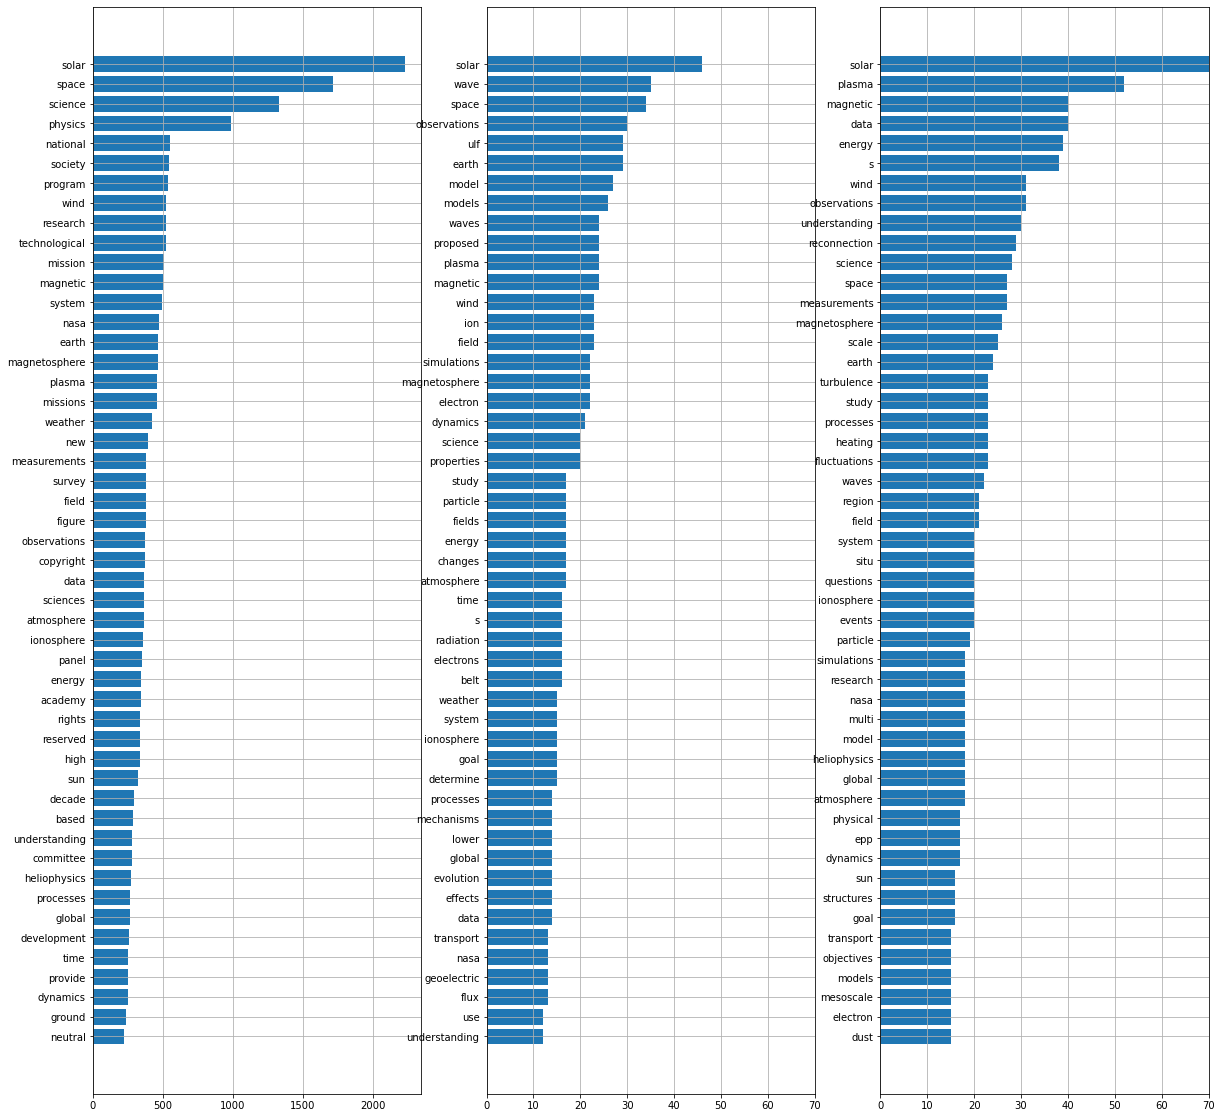

In [43]:
fig = plt.figure(figsize=(20,20))
gs = GridSpec(1,3, figure=fig)   

ax1 = fig.add_subplot(gs[0,0])
idx_to_plot = [0,50]
y_axis = np.arange(len(occurrences_decadal[idx_to_plot[0]:idx_to_plot[1]])+1, 1, -1)
plt.barh(y_axis, occurrences_decadal[idx_to_plot[0]:idx_to_plot[1]], align='center')
plt.yticks( y_axis,words_decadal[idx_to_plot[0]:idx_to_plot[1]],) #)rotation='vertical')
plt.grid(True)
# plt.xlim([0,70])

ax1 = fig.add_subplot(gs[0,1])
idx_to_plot = [0,50]
y_axis = np.arange(len(occurrences_2018[idx_to_plot[0]:idx_to_plot[1]])+1, 1, -1)
plt.barh(y_axis, occurrences_2018[idx_to_plot[0]:idx_to_plot[1]], align='center')
plt.yticks( y_axis,words_2018[idx_to_plot[0]:idx_to_plot[1]],) #)rotation='vertical')
plt.grid(True)
plt.xlim([0,70])

ax2 = fig.add_subplot(gs[0,2])
y_axis = np.arange(len(occurrences_2020[idx_to_plot[0]:idx_to_plot[1]])+1, 1, -1)
plt.barh(y_axis, occurrences_2020[idx_to_plot[0]:idx_to_plot[1]], align='center')
plt.yticks( y_axis,words_2020[idx_to_plot[0]:idx_to_plot[1]],) #)rotation='vertical')
plt.grid(True)
plt.xlim([0,70])

plt.show()


In [127]:
import plotly.graph_objects as go
import numpy as np

idx_to_plot = [0,50]


plot = go.Figure(data=[go.Bar(
    name='Decadal',
    x=occurrences_decadal[idx_to_plot[0]:idx_to_plot[1]],
    y=words_decadal[idx_to_plot[0]:idx_to_plot[1]],#np.arange(len(occurrences_decadal[idx_to_plot[0]:idx_to_plot[1]])+1, 1, -1),
    orientation='h',
#     yticks=words_decadal[idx_to_plot[0]:idx_to_plot[1]]
    ),
    go.Bar(
    name='2018',
    x=occurrences_2018[idx_to_plot[0]:idx_to_plot[1]],
    y=words_2018[idx_to_plot[0]:idx_to_plot[1]],#np.arange(len(occurrences_2018[idx_to_plot[0]:idx_to_plot[1]])+1, 1, -1),
    orientation='h',
#     yticks=words_2018[idx_to_plot[0]:idx_to_plot[1]]
    ),
    go.Bar(
    name='2020',
    x=occurrences_2020[idx_to_plot[0]:idx_to_plot[1]],
    y=words_2020[idx_to_plot[0]:idx_to_plot[1]],#np.arange(len(occurrences_2018[idx_to_plot[0]:idx_to_plot[1]])+1, 1, -1),
    orientation='h',
#     yticks=words_2018[idx_to_plot[0]:idx_to_plot[1]]
    )
])

# plot.update_layout(
#     yaxis = dict(
#         tickmode = 'array',
#         tickvals = np.arange(len(occurrences_decadal[idx_to_plot[0]:idx_to_plot[1]])+1, 1, -1),
#         ticktext = words_decadal[idx_to_plot[0]:idx_to_plot[1]]
#     )
# )
  
# Add dropdown
plot.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="Decadal",
                     method="update",
                     args=[{"visible": [True, False, False]},
                           {"title": "Decadal"}]),
                dict(label="2018",
                     method="update",
                     args=[{"visible": [False, True, False]},
                           {"title": "2018",
                            }]),
                dict(label="2020",
                     method="update",
                     args=[{"visible": [False, False, True]},
                           {"title": "2020",
                            }]),
                dict(label="All",
                     method="update",
                     args=[{"visible": [True, True, True]},
                           {"title": "All",
                            }]),
            ]),
        )
    ],
    margin=dict(l=20, r=20, t=20, b=20),
    width=1000,
    height=1000,
)

  
plot.show()

In [44]:
loc_solar_word_2018 = np.argwhere(words_2018 == 'solar')
loc_solar_word_2018

array([], shape=(0, 0), dtype=int64)

In [45]:
# sum(list(freqdict_decadal.values()))
sum(list(freqdict_2018.values()))


3634

In [46]:
import pandas as pd
freq_evol = pd.DataFrame(columns=['word','frequency decadal','probability decadal','frequency year 2018','probability year 2018','frequency year 2020','probability year 2020'],
                         index=range(len(words_decadal))
                        )
sum_occurrences_decadal = sum(list(freqdict_decadal.values()))
sum_occurrences_2018 = sum(list(freqdict_2018.values()))
sum_occurrences_2020 = sum(list(freqdict_2020.values()))

for i in range(len(words_decadal)):
    print('working on word = {}'.format(words_decadal[i]))
    word_to_trace = words_decadal[i]
    
    word_loop_decadal = words_decadal[words_decadal.index(word_to_trace)]
    freq_loop_decadal = list(freqdict_decadal.values())[list(freqdict_decadal.keys()).index(word_to_trace)]
    
    try:
        word_loop_2018 = words_2018[words_2018.index(word_to_trace)]
        freq_loop_2018 = list(freqdict_2018.values())[list(freqdict_2018.keys()).index(word_to_trace)]

    except:
        print('     {} not found in 2018'.format(word_to_trace))
        freq_loop_2018 = 0
        
    try:
        word_loop_2020 = words_2020[words_2020.index(word_to_trace)]
        freq_loop_2020 = list(freqdict_2020.values())[list(freqdict_2020.keys()).index(word_to_trace)]
    except:
        print('     {} not found in 2020'.format(word_to_trace))
        freq_loop_2020 = 0  

    freq_evol.loc[i]['word'] = word_to_trace
    freq_evol.loc[i]['frequency decadal'] = freq_loop_decadal
    freq_evol.loc[i]['frequency year 2018'] = freq_loop_2018
    freq_evol.loc[i]['frequency year 2020'] = freq_loop_2020
    
    freq_evol.loc[i]['probability decadal'] = freq_loop_decadal / sum_occurrences_decadal
    freq_evol.loc[i]['probability year 2018'] = freq_loop_2018 / sum_occurrences_2018
    freq_evol.loc[i]['probability year 2020'] = freq_loop_2020 / sum_occurrences_2020
    

working on word = solar
working on word = space
working on word = science
working on word = physics
working on word = national
     national not found in 2018
working on word = society
     society not found in 2018
working on word = program
working on word = wind
working on word = research
working on word = technological
working on word = mission
     mission not found in 2018
working on word = magnetic
working on word = system
working on word = nasa
working on word = earth
working on word = magnetosphere
working on word = plasma
working on word = missions
working on word = weather
working on word = new
working on word = measurements
working on word = survey
working on word = field
working on word = figure
     figure not found in 2018
     figure not found in 2020
working on word = observations
working on word = copyright
     copyright not found in 2018
     copyright not found in 2020
working on word = data
working on word = sciences
working on word = atmosphere
working on word = i

working on word = terrestrial
working on word = ray
     ray not found in 2018
working on word = imap
     imap not found in 2018
     imap not found in 2020
working on word = evolution
working on word = million
     million not found in 2018
working on word = effective
     effective not found in 2018
working on word = composition
working on word = coming
     coming not found in 2018
     coming not found in 2020
working on word = agencies
     agencies not found in 2018
     agencies not found in 2020
working on word = required
working on word = particular
working on word = number
working on word = behavior
working on word = assets
     assets not found in 2018
     assets not found in 2020
working on word = american
     american not found in 2018
     american not found in 2020
working on word = observed
working on word = need
     need not found in 2020
working on word = instrumentation
     instrumentation not found in 2018
     instrumentation not found in 2020
working on word 

working on word = euv
     euv not found in 2018
     euv not found in 2020
working on word = establish
     establish not found in 2018
working on word = enhanced
     enhanced not found in 2018
working on word = directly
working on word = coverage
     coverage not found in 2018
     coverage not found in 2020
working on word = continuous
     continuous not found in 2018
working on word = components
     components not found in 2018
     components not found in 2020
working on word = thermal
working on word = second
working on word = previous
working on word = prediction
working on word = note
     note not found in 2018
     note not found in 2020
working on word = larger
     larger not found in 2018
working on word = increased
     increased not found in 2020
working on word = includes
     includes not found in 2018
     includes not found in 2020
working on word = highest
     highest not found in 2020
working on word = given
     given not found in 2018
     given not found in

working on word = known
working on word = investigator
working on word = improve
working on word = frontiers
     frontiers not found in 2018
     frontiers not found in 2020
working on word = found
     found not found in 2018
working on word = force
     force not found in 2018
working on word = explore
working on word = experiments
working on word = escape
     escape not found in 2018
     escape not found in 2020
working on word = determining
     determining not found in 2020
working on word = boundaries
     boundaries not found in 2018
working on word = relatively
     relatively not found in 2020
working on word = realize
     realize not found in 2018
working on word = radar
     radar not found in 2018
working on word = produced
working on word = precipitation
working on word = origins
working on word = multiagency
     multiagency not found in 2018
     multiagency not found in 2020
working on word = longitudinal
     longitudinal not found in 2018
     longitudinal not fou

working on word = connections
     connections not found in 2018
working on word = characterize
working on word = called
working on word = basis
     basis not found in 2018
     basis not found in 2020
working on word = august
     august not found in 2018
     august not found in 2020
working on word = approaches
     approaches not found in 2018
     approaches not found in 2020
working on word = amisr
     amisr not found in 2018
     amisr not found in 2020
working on word = action
     action not found in 2020
working on word = working
working on word = uranus
     uranus not found in 2018
     uranus not found in 2020
working on word = underlying
     underlying not found in 2018
working on word = sufficient
     sufficient not found in 2018
     sufficient not found in 2020
working on word = success
     success not found in 2020
working on word = strength
     strength not found in 2018
working on word = stratosphere
     stratosphere not found in 2018
working on word = specif

working on word = evident
     evident not found in 2018
     evident not found in 2020
working on word = developments
     developments not found in 2018
     developments not found in 2020
working on word = details
     details not found in 2018
     details not found in 2020
working on word = design
     design not found in 2018
     design not found in 2020
working on word = deployment
     deployment not found in 2018
     deployment not found in 2020
working on word = dependent
working on word = define
     define not found in 2018
     define not found in 2020
working on word = dedicated
     dedicated not found in 2018
     dedicated not found in 2020
working on word = coordinate
     coordinate not found in 2018
     coordinate not found in 2020
working on word = controls
     controls not found in 2020
working on word = collisions
     collisions not found in 2018
     collisions not found in 2020
working on word = clear
working on word = best
     best not found in 2020
work

working on word = effectiveness
     effectiveness not found in 2018
working on word = economic
     economic not found in 2018
     economic not found in 2020
working on word = duration
     duration not found in 2020
working on word = discussion
     discussion not found in 2020
working on word = despite
working on word = defining
     defining not found in 2018
     defining not found in 2020
working on word = constrained
     constrained not found in 2018
     constrained not found in 2020
working on word = configurations
     configurations not found in 2020
working on word = comparative
     comparative not found in 2018
working on word = combining
working on word = collaboration
     collaboration not found in 2020
working on word = cold
     cold not found in 2020
working on word = carry
     carry not found in 2018
     carry not found in 2020
working on word = budgetary
     budgetary not found in 2018
     budgetary not found in 2020
working on word = beginning
     beginnin

working on word = joule
     joule not found in 2018
working on word = interval
     interval not found in 2018
     interval not found in 2020
working on word = instance
     instance not found in 2018
     instance not found in 2020
working on word = insight
     insight not found in 2020
working on word = initiated
     initiated not found in 2018
     initiated not found in 2020
working on word = independent
     independent not found in 2018
     independent not found in 2020
working on word = implications
     implications not found in 2018
working on word = imagers
     imagers not found in 2018
working on word = ie
working on word = hosted
     hosted not found in 2018
     hosted not found in 2020
working on word = historically
     historically not found in 2018
working on word = heterogeneous
     heterogeneous not found in 2018
     heterogeneous not found in 2020
working on word = heated
     heated not found in 2018
working on word = hard
     hard not found in 2018
worki

working on word = cap
     cap not found in 2018
working on word = bursts
working on word = believes
     believes not found in 2018
     believes not found in 2020
working on word = barrel
     barrel not found in 2018
     barrel not found in 2020
working on word = axis
     axis not found in 2018
     axis not found in 2020
working on word = assumed
     assumed not found in 2018
     assumed not found in 2020
working on word = assimilation
     assimilation not found in 2018
     assimilation not found in 2020
working on word = art
working on word = andor
working on word = airglow
     airglow not found in 2018
     airglow not found in 2020
working on word = accomplishing
     accomplishing not found in 2018
     accomplishing not found in 2020
working on word = worlds
     worlds not found in 2018
     worlds not found in 2020
working on word = water
     water not found in 2018
     water not found in 2020
working on word = track
     track not found in 2018
     track not found

working on word = isr
     isr not found in 2018
     isr not found in 2020
working on word = interface
     interface not found in 2018
working on word = inside
     inside not found in 2018
working on word = innovation
     innovation not found in 2018
working on word = informed
     informed not found in 2018
     informed not found in 2020
working on word = influenced
     influenced not found in 2018
     influenced not found in 2020
working on word = indicates
     indicates not found in 2018
     indicates not found in 2020
working on word = inadequate
     inadequate not found in 2018
     inadequate not found in 2020
working on word = ice
     ice not found in 2018
     ice not found in 2020
working on word = host
     host not found in 2018
     host not found in 2020
working on word = hazards
     hazards not found in 2018
     hazards not found in 2020
working on word = having
     having not found in 2018
     having not found in 2020
working on word = hardware
     hardwa

     exhibits not found in 2018
     exhibits not found in 2020
working on word = evaluate
working on word = european
     european not found in 2018
     european not found in 2020
working on word = essentially
     essentially not found in 2018
     essentially not found in 2020
working on word = es
     es not found in 2018
     es not found in 2020
working on word = erosion
     erosion not found in 2018
     erosion not found in 2020
working on word = era
     era not found in 2018
     era not found in 2020
working on word = entering
     entering not found in 2018
     entering not found in 2020
working on word = ends
     ends not found in 2018
     ends not found in 2020
working on word = east
     east not found in 2018
     east not found in 2020
working on word = downward
     downward not found in 2018
working on word = dominate
     dominate not found in 2020
working on word = distances
     distances not found in 2020
working on word = disk
     disk not found in 2018
  

     dj not found in 2020
working on word = diurnal
     diurnal not found in 2018
     diurnal not found in 2020
working on word = dissipated
     dissipated not found in 2018
working on word = directorates
     directorates not found in 2018
     directorates not found in 2020
working on word = difference
     difference not found in 2020
working on word = detectors
     detectors not found in 2018
working on word = deploy
     deploy not found in 2018
working on word = demonstrates
     demonstrates not found in 2018
     demonstrates not found in 2020
working on word = deliver
     deliver not found in 2018
     deliver not found in 2020
working on word = delayed
     delayed not found in 2018
working on word = degrees
     degrees not found in 2018
     degrees not found in 2020
working on word = definitive
     definitive not found in 2018
     definitive not found in 2020
working on word = definition
     definition not found in 2018
     definition not found in 2020
working on 

working on word = limiting
     limiting not found in 2018
     limiting not found in 2020
working on word = limitations
     limitations not found in 2018
working on word = likewise
     likewise not found in 2018
     likewise not found in 2020
working on word = lightning
     lightning not found in 2018
     lightning not found in 2020
working on word = lbh
     lbh not found in 2018
     lbh not found in 2020
working on word = launchers
     launchers not found in 2018
     launchers not found in 2020
working on word = latitudinal
     latitudinal not found in 2018
     latitudinal not found in 2020
working on word = latest
     latest not found in 2018
     latest not found in 2020
working on word = late
     late not found in 2018
     late not found in 2020
working on word = lanl
     lanl not found in 2018
     lanl not found in 2020
working on word = kind
     kind not found in 2018
     kind not found in 2020
working on word = kilometric
     kilometric not found in 2018
    

     trade not found in 2018
     trade not found in 2020
working on word = tory
     tory not found in 2018
     tory not found in 2020
working on word = topic
     topic not found in 2018
     topic not found in 2020
working on word = tives
     tives not found in 2018
     tives not found in 2020
working on word = tive
     tive not found in 2018
     tive not found in 2020
working on word = timescale
     timescale not found in 2018
     timescale not found in 2020
working on word = threaten
     threaten not found in 2020
working on word = tested
     tested not found in 2020
working on word = tenuous
     tenuous not found in 2018
     tenuous not found in 2020
working on word = taurus
     taurus not found in 2018
     taurus not found in 2020
working on word = task
working on word = tackle
     tackle not found in 2018
     tackle not found in 2020
working on word = synergy
     synergy not found in 2018
     synergy not found in 2020
working on word = surveys
     surveys not 

working on word = jr
     jr not found in 2018
     jr not found in 2020
working on word = jpl
     jpl not found in 2018
     jpl not found in 2020
working on word = jp
     jp not found in 2018
     jp not found in 2020
working on word = jg
     jg not found in 2018
     jg not found in 2020
working on word = jerry
     jerry not found in 2018
     jerry not found in 2020
working on word = itar
     itar not found in 2018
     itar not found in 2020
working on word = isccp
     isccp not found in 2018
     isccp not found in 2020
working on word = ionospheres
     ionospheres not found in 2018
     ionospheres not found in 2020
working on word = inward
     inward not found in 2018
     inward not found in 2020
working on word = investigators
     investigators not found in 2018
     investigators not found in 2020
working on word = invest
     invest not found in 2018
     invest not found in 2020
working on word = integration
     integration not found in 2018
     integration not 

     whi not found in 2018
     whi not found in 2020
working on word = wavelength
working on word = wash
     wash not found in 2018
     wash not found in 2020
working on word = warnings
     warnings not found in 2018
     warnings not found in 2020
working on word = warmings
     warmings not found in 2018
     warmings not found in 2020
working on word = volts
     volts not found in 2018
     volts not found in 2020
working on word = visibility
     visibility not found in 2018
     visibility not found in 2020
working on word = virtual
     virtual not found in 2018
     virtual not found in 2020
working on word = vigorous
     vigorous not found in 2018
     vigorous not found in 2020
working on word = vibrant
     vibrant not found in 2018
     vibrant not found in 2020
working on word = verification
     verification not found in 2018
     verification not found in 2020
working on word = venus
     venus not found in 2020
working on word = vations
     vations not found in 20

working on word = owes
     owes not found in 2018
     owes not found in 2020
working on word = outlines
     outlines not found in 2018
     outlines not found in 2020
working on word = outline
     outline not found in 2018
     outline not found in 2020
working on word = oscillation
     oscillation not found in 2018
     oscillation not found in 2020
working on word = organized
working on word = organizations
     organizations not found in 2018
     organizations not found in 2020
working on word = optimize
     optimize not found in 2018
     optimize not found in 2020
working on word = operationally
     operationally not found in 2018
     operationally not found in 2020
working on word = ones
     ones not found in 2018
     ones not found in 2020
working on word = onboard
     onboard not found in 2018
     onboard not found in 2020
working on word = old
     old not found in 2018
     old not found in 2020
working on word = obstacle
     obstacle not found in 2018
     obst

working on word = fashion
     fashion not found in 2018
     fashion not found in 2020
working on word = farther
     farther not found in 2018
     farther not found in 2020
working on word = extracted
     extracted not found in 2018
     extracted not found in 2020
working on word = externally
     externally not found in 2018
     externally not found in 2020
working on word = experienced
     experienced not found in 2018
     experienced not found in 2020
working on word = expense
     expense not found in 2018
     expense not found in 2020
working on word = expectations
     expectations not found in 2018
     expectations not found in 2020
working on word = exosphere
     exosphere not found in 2018
     exosphere not found in 2020
working on word = executing
     executing not found in 2018
     executing not found in 2020
working on word = executed
     executed not found in 2018
     executed not found in 2020
working on word = evening
     evening not found in 2018
     e

working on word = visualize
     visualize not found in 2018
     visualize not found in 2020
working on word = visit
     visit not found in 2018
     visit not found in 2020
working on word = viewing
     viewing not found in 2018
     viewing not found in 2020
working on word = viewed
     viewed not found in 2018
     viewed not found in 2020
working on word = vicinity
     vicinity not found in 2018
     vicinity not found in 2020
working on word = velocities
     velocities not found in 2020
working on word = ve
     ve not found in 2018
     ve not found in 2020
working on word = vapor
     vapor not found in 2018
     vapor not found in 2020
working on word = valley
     valley not found in 2018
     valley not found in 2020
working on word = validating
     validating not found in 2018
     validating not found in 2020
working on word = validated
     validated not found in 2018
working on word = uvcsii
     uvcsii not found in 2018
     uvcsii not found in 2020
working on wor

working on word = recogni
     recogni not found in 2018
     recogni not found in 2020
working on word = receiver
     receiver not found in 2018
     receiver not found in 2020
working on word = rebalancing
     rebalancing not found in 2018
     rebalancing not found in 2020
working on word = rebalance
     rebalance not found in 2018
     rebalance not found in 2020
working on word = reasons
     reasons not found in 2018
     reasons not found in 2020
working on word = realities
     realities not found in 2018
     realities not found in 2020
working on word = reactive
     reactive not found in 2018
     reactive not found in 2020
working on word = reaction
     reaction not found in 2018
     reaction not found in 2020
working on word = rated
     rated not found in 2018
     rated not found in 2020
working on word = ranking
     ranking not found in 2018
     ranking not found in 2020
working on word = raises
     raises not found in 2018
     raises not found in 2020
working 

working on word = kasper
     kasper not found in 2018
     kasper not found in 2020
working on word = jointly
     jointly not found in 2018
     jointly not found in 2020
working on word = joined
     joined not found in 2018
     joined not found in 2020
working on word = join
     join not found in 2018
     join not found in 2020
working on word = joe
     joe not found in 2018
     joe not found in 2020
working on word = jl
     jl not found in 2018
     jl not found in 2020
working on word = jaxa
     jaxa not found in 2018
     jaxa not found in 2020
working on word = japanese
     japanese not found in 2018
     japanese not found in 2020
working on word = janet
     janet not found in 2018
     janet not found in 2020
working on word = james
     james not found in 2018
     james not found in 2020
working on word = ja
     ja not found in 2018
     ja not found in 2020
working on word = ivm
     ivm not found in 2018
     ivm not found in 2020
working on word = iss
     iss 

working on word = exact
     exact not found in 2018
     exact not found in 2020
working on word = ex
     ex not found in 2018
     ex not found in 2020
working on word = evolved
     evolved not found in 2018
     evolved not found in 2020
working on word = eventually
     eventually not found in 2018
     eventually not found in 2020
working on word = europe
     europe not found in 2018
     europe not found in 2020
working on word = establishment
     establishment not found in 2018
     establishment not found in 2020
working on word = erupting
     erupting not found in 2018
     erupting not found in 2020
working on word = ergun
     ergun not found in 2018
     ergun not found in 2020
working on word = equatorward
     equatorward not found in 2018
     equatorward not found in 2020
working on word = epoch
     epoch not found in 2020
working on word = envelope
     envelope not found in 2018
     envelope not found in 2020
working on word = enters
     enters not found in 20

working on word = body
     body not found in 2018
     body not found in 2020
working on word = blake
     blake not found in 2018
     blake not found in 2020
working on word = beta
     beta not found in 2018
working on word = beneficial
     beneficial not found in 2018
     beneficial not found in 2020
working on word = began
     began not found in 2018
     began not found in 2020
working on word = beams
working on word = bbso
     bbso not found in 2018
     bbso not found in 2020
working on word = barely
     barely not found in 2018
     barely not found in 2020
working on word = bang
     bang not found in 2018
     bang not found in 2020
working on word = aware
     aware not found in 2018
     aware not found in 2020
working on word = authority
     authority not found in 2018
     authority not found in 2020
working on word = auspices
     auspices not found in 2018
     auspices not found in 2020
working on word = aurorally
     aurorally not found in 2018
     aurorally

working on word = unimpeded
     unimpeded not found in 2018
     unimpeded not found in 2020
working on word = uniformly
     uniformly not found in 2018
working on word = unfortunately
     unfortunately not found in 2018
     unfortunately not found in 2020
working on word = unforeseen
     unforeseen not found in 2018
     unforeseen not found in 2020
working on word = unfolding
     unfolding not found in 2018
     unfolding not found in 2020
working on word = uneven
     uneven not found in 2018
     uneven not found in 2020
working on word = unequivocally
     unequivocally not found in 2018
     unequivocally not found in 2020
working on word = undertaking
     undertaking not found in 2018
     undertaking not found in 2020
working on word = undertake
     undertake not found in 2018
     undertake not found in 2020
working on word = underscores
     underscores not found in 2018
     underscores not found in 2020
working on word = underpins
     underpins not found in 2018
  

working on word = spots
     spots not found in 2018
     spots not found in 2020
working on word = spontaneously
     spontaneously not found in 2018
     spontaneously not found in 2020
working on word = spontaneous
     spontaneous not found in 2018
     spontaneous not found in 2020
working on word = sponsorship
     sponsorship not found in 2018
     sponsorship not found in 2020
working on word = sponsors
     sponsors not found in 2018
     sponsors not found in 2020
working on word = spicule
     spicule not found in 2018
     spicule not found in 2020
working on word = spheres
     spheres not found in 2018
     spheres not found in 2020
working on word = spending
     spending not found in 2018
     spending not found in 2020
working on word = spend
     spend not found in 2018
     spend not found in 2020
working on word = spectrographic
     spectrographic not found in 2018
     spectrographic not found in 2020
working on word = spec
     spec not found in 2018
     spec no

working on word = realism
     realism not found in 2018
     realism not found in 2020
working on word = readjustment
     readjustment not found in 2018
     readjustment not found in 2020
working on word = reader
     reader not found in 2018
     reader not found in 2020
working on word = reactions
     reactions not found in 2018
     reactions not found in 2020
working on word = rc
     rc not found in 2018
     rc not found in 2020
working on word = ratory
     ratory not found in 2018
     ratory not found in 2020
working on word = ratings
     ratings not found in 2018
     ratings not found in 2020
working on word = rarified
     rarified not found in 2018
     rarified not found in 2020
working on word = rankings
     rankings not found in 2018
     rankings not found in 2020
working on word = rank
     rank not found in 2018
     rank not found in 2020
working on word = randy
     randy not found in 2018
     randy not found in 2020
working on word = random
     random not 

     nodes not found in 2018
     nodes not found in 2020
working on word = nitrogen
     nitrogen not found in 2018
     nitrogen not found in 2020
working on word = nichols
     nichols not found in 2018
     nichols not found in 2020
working on word = news
     news not found in 2018
     news not found in 2020
working on word = netopause
     netopause not found in 2018
     netopause not found in 2020
working on word = ness
     ness not found in 2018
     ness not found in 2020
working on word = necessity
     necessity not found in 2018
     necessity not found in 2020
working on word = necessitates
     necessitates not found in 2018
     necessitates not found in 2020
working on word = nearest
     nearest not found in 2018
     nearest not found in 2020
working on word = nearer
     nearer not found in 2018
     nearer not found in 2020
working on word = nearby
working on word = naviga
     naviga not found in 2018
     naviga not found in 2020
working on word = nationally
  

working on word = liewer
     liewer not found in 2018
     liewer not found in 2020
working on word = liemohn
     liemohn not found in 2018
     liemohn not found in 2020
working on word = lie
     lie not found in 2018
     lie not found in 2020
working on word = liaison
     liaison not found in 2018
     liaison not found in 2020
working on word = leverages
     leverages not found in 2018
     leverages not found in 2020
working on word = lepping
     lepping not found in 2018
     lepping not found in 2020
working on word = lenging
     lenging not found in 2018
     lenging not found in 2020
working on word = lei
     lei not found in 2018
     lei not found in 2020
working on word = lege
     lege not found in 2018
     lege not found in 2020
working on word = lee
     lee not found in 2018
     lee not found in 2020
working on word = lecp
     lecp not found in 2018
working on word = lecacheux
     lecacheux not found in 2018
     lecacheux not found in 2020
working on word =

working on word = hilmer
     hilmer not found in 2018
     hilmer not found in 2020
working on word = highlights
     highlights not found in 2018
     highlights not found in 2020
working on word = highlighted
     highlighted not found in 2018
     highlighted not found in 2020
working on word = hickson
     hickson not found in 2018
     hickson not found in 2020
working on word = hesse
     hesse not found in 2018
     hesse not found in 2020
working on word = hemispheres
     hemispheres not found in 2018
     hemispheres not found in 2020
working on word = helping
     helping not found in 2018
working on word = helicity
     helicity not found in 2018
     helicity not found in 2020
working on word = helical
     helical not found in 2018
     helical not found in 2020
working on word = heinselman
     heinselman not found in 2018
     heinselman not found in 2020
working on word = heavier
     heavier not found in 2018
     heavier not found in 2020
working on word = heaters
 

     earthscope not found in 2018
     earthscope not found in 2020
working on word = earliest
     earliest not found in 2018
     earliest not found in 2020
working on word = duskside
     duskside not found in 2018
     duskside not found in 2020
working on word = dusk
     dusk not found in 2018
     dusk not found in 2020
working on word = dur
     dur not found in 2018
     dur not found in 2020
working on word = dump
     dump not found in 2018
     dump not found in 2020
working on word = duced
     duced not found in 2018
     duced not found in 2020
working on word = dubbed
     dubbed not found in 2018
     dubbed not found in 2020
working on word = druckmüller
     druckmüller not found in 2018
     druckmüller not found in 2020
working on word = drew
     drew not found in 2018
     drew not found in 2020
working on word = draws
     draws not found in 2018
     draws not found in 2020
working on word = drawn
     drawn not found in 2018
     drawn not found in 2020
workin

working on word = clarified
     clarified not found in 2018
     clarified not found in 2020
working on word = cj
     cj not found in 2018
     cj not found in 2020
working on word = cited
     cited not found in 2018
     cited not found in 2020
working on word = cir
     cir not found in 2018
     cir not found in 2020
working on word = chen
     chen not found in 2018
working on word = cheaply
     cheaply not found in 2018
     cheaply not found in 2020
working on word = cheaper
     cheaper not found in 2018
     cheaper not found in 2020
working on word = charts
     charts not found in 2018
     charts not found in 2020
working on word = charter
     charter not found in 2018
     charter not found in 2020
working on word = charles
     charles not found in 2018
     charles not found in 2020
working on word = charging
     charging not found in 2018
     charging not found in 2020
working on word = chal
     chal not found in 2018
     chal not found in 2020
working on word =

     accumulated not found in 2020
working on word = accretion
     accretion not found in 2018
     accretion not found in 2020
working on word = according
     according not found in 2018
working on word = accessed
     accessed not found in 2018
     accessed not found in 2020
working on word = accelerometer
     accelerometer not found in 2018
     accelerometer not found in 2020
working on word = absent
     absent not found in 2018
     absent not found in 2020
working on word = aboard
     aboard not found in 2018
     aboard not found in 2020
working on word = ψres
     ψres not found in 2018
     ψres not found in 2020
working on word = δe
     δe not found in 2018
     δe not found in 2020
working on word = zurbuchen
     zurbuchen not found in 2018
     zurbuchen not found in 2020
working on word = zurbu
     zurbu not found in 2018
     zurbu not found in 2020
working on word = zettergren
     zettergren not found in 2018
     zettergren not found in 2020
working on word = 

working on word = utiliza
     utiliza not found in 2018
     utiliza not found in 2020
working on word = utilities
     utilities not found in 2018
     utilities not found in 2020
working on word = ute
     ute not found in 2018
     ute not found in 2020
working on word = usual
     usual not found in 2018
     usual not found in 2020
working on word = usgovernment
     usgovernment not found in 2018
     usgovernment not found in 2020
working on word = useuropean
     useuropean not found in 2018
     useuropean not found in 2020
working on word = usefulness
     usefulness not found in 2018
     usefulness not found in 2020
working on word = usarray
     usarray not found in 2018
     usarray not found in 2020
working on word = upset
     upset not found in 2018
     upset not found in 2020
working on word = upgoing
     upgoing not found in 2018
     upgoing not found in 2020
working on word = upfront
     upfront not found in 2018
     upfront not found in 2020
working on word =

     took not found in 2018
     took not found in 2020
working on word = tongue
     tongue not found in 2018
     tongue not found in 2020
working on word = ton
     ton not found in 2018
     ton not found in 2020
working on word = tomographic
     tomographic not found in 2018
     tomographic not found in 2020
working on word = tometer
     tometer not found in 2018
     tometer not found in 2020
working on word = tomczyk
     tomczyk not found in 2018
     tomczyk not found in 2020
working on word = told
     told not found in 2018
     told not found in 2020
working on word = tokomak
     tokomak not found in 2018
     tokomak not found in 2020
working on word = token
     token not found in 2018
     token not found in 2020
working on word = todd
     todd not found in 2018
     todd not found in 2020
working on word = tobiska
     tobiska not found in 2018
     tobiska not found in 2020
working on word = title
working on word = tit
     tit not found in 2018
     tit not found

     subsidence not found in 2018
     subsidence not found in 2020
working on word = subsection
     subsection not found in 2018
     subsection not found in 2020
working on word = subseconds
     subseconds not found in 2018
     subseconds not found in 2020
working on word = subscription
     subscription not found in 2018
     subscription not found in 2020
working on word = subscribers
     subscribers not found in 2018
     subscribers not found in 2020
working on word = subscribed
     subscribed not found in 2018
     subscribed not found in 2020
working on word = subquestions
     subquestions not found in 2018
     subquestions not found in 2020
working on word = suborbitally
     suborbitally not found in 2018
     suborbitally not found in 2020
working on word = submit
     submit not found in 2018
     submit not found in 2020
working on word = subminute
     subminute not found in 2018
     subminute not found in 2020
working on word = subharmonics
     subharmonics not 

working on word = solidified
     solidified not found in 2018
     solidified not found in 2020
working on word = solicitations
     solicitations not found in 2018
     solicitations not found in 2020
working on word = sojka
     sojka not found in 2018
     sojka not found in 2020
working on word = softball
     softball not found in 2018
     softball not found in 2020
working on word = snapshots
     snapshots not found in 2018
     snapshots not found in 2020
working on word = smei
     smei not found in 2018
     smei not found in 2020
working on word = smallest
     smallest not found in 2018
     smallest not found in 2020
working on word = slower
     slower not found in 2018
     slower not found in 2020
working on word = slovak
     slovak not found in 2018
     slovak not found in 2020
working on word = slot
     slot not found in 2018
     slot not found in 2020
working on word = slkeil
     slkeil not found in 2018
     slkeil not found in 2020
working on word = slippage

working on word = rod
     rod not found in 2018
     rod not found in 2020
working on word = rocky
     rocky not found in 2018
     rocky not found in 2020
working on word = robyn
     robyn not found in 2018
     robyn not found in 2020
working on word = robotically
     robotically not found in 2018
     robotically not found in 2020
working on word = roanoke
     roanoke not found in 2018
     roanoke not found in 2020
working on word = roadmaps
     roadmaps not found in 2018
     roadmaps not found in 2020
working on word = rl
     rl not found in 2018
     rl not found in 2020
working on word = riverside
     riverside not found in 2018
     riverside not found in 2020
working on word = risen
     risen not found in 2018
     risen not found in 2020
working on word = riometers
     riometers not found in 2018
     riometers not found in 2020
working on word = rings
     rings not found in 2018
     rings not found in 2020
working on word = riley
     riley not found in 2018
   

     quantita not found in 2018
     quantita not found in 2020
working on word = quantifying
     quantifying not found in 2018
     quantifying not found in 2020
working on word = qualitatively
     qualitatively not found in 2018
     qualitatively not found in 2020
working on word = qualify
     qualify not found in 2018
     qualify not found in 2020
working on word = qualified
     qualified not found in 2020
working on word = quadrupolar
     quadrupolar not found in 2018
     quadrupolar not found in 2020
working on word = pw
     pw not found in 2018
working on word = puts
     puts not found in 2018
     puts not found in 2020
working on word = putational
     putational not found in 2018
     putational not found in 2020
working on word = pushes
     pushes not found in 2018
     pushes not found in 2020
working on word = push
     push not found in 2018
     push not found in 2020
working on word = purview
     purview not found in 2018
     purview not found in 2020
workin

working on word = pho
     pho not found in 2018
     pho not found in 2020
working on word = phenomenon
     phenomenon not found in 2018
working on word = phd
     phd not found in 2018
working on word = pfaff
     pfaff not found in 2018
     pfaff not found in 2020
working on word = petrosian
     petrosian not found in 2018
     petrosian not found in 2020
working on word = peterson
     peterson not found in 2018
     peterson not found in 2020
working on word = peted
     peted not found in 2018
     peted not found in 2020
working on word = pete
     pete not found in 2018
     pete not found in 2020
working on word = petabytes
     petabytes not found in 2018
     petabytes not found in 2020
working on word = perturbs
     perturbs not found in 2018
     perturbs not found in 2020
working on word = pertains
     pertains not found in 2018
     pertains not found in 2020
working on word = pertain
     pertain not found in 2018
     pertain not found in 2020
working on word = pe

     officially not found in 2018
     officially not found in 2020
working on word = offices
     offices not found in 2018
     offices not found in 2020
working on word = ofcm
     ofcm not found in 2018
     ofcm not found in 2020
working on word = oedg
     oedg not found in 2018
     oedg not found in 2020
working on word = odstrcil
     odstrcil not found in 2018
     odstrcil not found in 2020
working on word = odile
     odile not found in 2018
     odile not found in 2020
working on word = odicities
     odicities not found in 2018
     odicities not found in 2020
working on word = oceanography
     oceanography not found in 2018
     oceanography not found in 2020
working on word = occulter
     occulter not found in 2018
     occulter not found in 2020
working on word = occasionally
     occasionally not found in 2018
     occasionally not found in 2020
working on word = ocally
     ocally not found in 2018
     ocally not found in 2020
working on word = oc
     oc not foun

working on word = moderating
     moderating not found in 2018
     moderating not found in 2020
working on word = moderately
     moderately not found in 2018
     moderately not found in 2020
working on word = moder
     moder not found in 2018
     moder not found in 2020
working on word = mod
     mod not found in 2018
     mod not found in 2020
working on word = mm
     mm not found in 2018
     mm not found in 2020
working on word = mixture
     mixture not found in 2018
     mixture not found in 2020
working on word = mixed
     mixed not found in 2018
     mixed not found in 2020
working on word = mittently
     mittently not found in 2018
     mittently not found in 2020
working on word = mitre
     mitre not found in 2018
     mitre not found in 2020
working on word = mitigating
     mitigating not found in 2020
working on word = mitigates
     mitigates not found in 2018
     mitigates not found in 2020
working on word = missionsheliophysics
     missionsheliophysics not fou

working on word = looped
     looped not found in 2018
     looped not found in 2020
working on word = looney
     looney not found in 2018
     looney not found in 2020
working on word = loomis
     loomis not found in 2018
     loomis not found in 2020
working on word = looking
     looking not found in 2018
working on word = longitudinally
     longitudinally not found in 2018
     longitudinally not found in 2020
working on word = longitu
     longitu not found in 2018
     longitu not found in 2020
working on word = longi
     longi not found in 2018
     longi not found in 2020
working on word = longest
     longest not found in 2018
     longest not found in 2020
working on word = lon
     lon not found in 2018
     lon not found in 2020
working on word = logistical
     logistical not found in 2018
     logistical not found in 2020
working on word = logarithmic
     logarithmic not found in 2018
     logarithmic not found in 2020
working on word = loft
     loft not found in 20

     intricate not found in 2018
     intricate not found in 2020
working on word = intra
     intra not found in 2018
     intra not found in 2020
working on word = interviewed
     interviewed not found in 2018
     interviewed not found in 2020
working on word = intersteller
     intersteller not found in 2018
     intersteller not found in 2020
working on word = intersect
     intersect not found in 2018
     intersect not found in 2020
working on word = intersatellite
     intersatellite not found in 2018
     intersatellite not found in 2020
working on word = interpretive
     interpretive not found in 2018
     interpretive not found in 2020
working on word = interpreted
     interpreted not found in 2018
     interpreted not found in 2020
working on word = interpreta
     interpreta not found in 2018
     interpreta not found in 2020
working on word = interpre
     interpre not found in 2018
     interpre not found in 2020
working on word = interpersonal
     interpersonal not 

     httpwwwnsfgovdivindexjspdivast not found in 2018
     httpwwwnsfgovdivindexjspdivast not found in 2020
working on word = httpwwwnsfgov
     httpwwwnsfgov not found in 2018
     httpwwwnsfgov not found in 2020
working on word = httpwwwnasagovtopicssolarsystem
     httpwwwnasagovtopicssolarsystem not found in 2018
     httpwwwnasagovtopicssolarsystem not found in 2020
working on word = httpwwwnasagovmissionpagessunearth
     httpwwwnasagovmissionpagessunearth not found in 2018
     httpwwwnasagovmissionpagessunearth not found in 2020
working on word = httpwwwnasagovhome
     httpwwwnasagovhome not found in 2018
     httpwwwnasagovhome not found in 2020
working on word = httpwwwnasa
     httpwwwnasa not found in 2018
     httpwwwnasa not found in 2020
working on word = httpwwwhqnasagovofficecodeqtrltrlpdf
     httpwwwhqnasagovofficecodeqtrltrlpdf not found in 2018
     httpwwwhqnasagovofficecodeqtrltrlpdf not found in 2020
working on word = httpwwwearthscopeorgobservatoriesusarray
  

     glesener not found in 2018
     glesener not found in 2020
working on word = glean
     glean not found in 2020
working on word = gj
     gj not found in 2018
     gj not found in 2020
working on word = gitudinal
     gitudinal not found in 2018
     gitudinal not found in 2020
working on word = gigantic
     gigantic not found in 2018
     gigantic not found in 2020
working on word = gibson
     gibson not found in 2018
     gibson not found in 2020
working on word = giants
     giants not found in 2018
     giants not found in 2020
working on word = giacalone
     giacalone not found in 2018
     giacalone not found in 2020
working on word = gev
     gev not found in 2018
     gev not found in 2020
working on word = getic
     getic not found in 2018
     getic not found in 2020
working on word = ger
     ger not found in 2018
     ger not found in 2020
working on word = geospatial
     geospatial not found in 2018
     geospatial not found in 2020
working on word = georgia
    

     fg not found in 2018
     fg not found in 2020
working on word = fertile
     fertile not found in 2018
     fertile not found in 2020
working on word = fernando
     fernando not found in 2018
     fernando not found in 2020
working on word = ferences
     ferences not found in 2018
     ferences not found in 2020
working on word = fered
     fered not found in 2018
     fered not found in 2020
working on word = fennell
     fennell not found in 2018
     fennell not found in 2020
working on word = fellowship
     fellowship not found in 2018
working on word = felectromag
     felectromag not found in 2018
     felectromag not found in 2020
working on word = feet
     feet not found in 2018
     feet not found in 2020
working on word = feel
     feel not found in 2018
     feel not found in 2020
working on word = featuring
     featuring not found in 2018
     featuring not found in 2020
working on word = faring
     faring not found in 2018
     faring not found in 2020
working 

     emerges not found in 2018
     emerges not found in 2020
working on word = emer
     emer not found in 2018
     emer not found in 2020
working on word = embodied
     embodied not found in 2018
     embodied not found in 2020
working on word = embed
     embed not found in 2018
     embed not found in 2020
working on word = embarking
     embarking not found in 2018
     embarking not found in 2020
working on word = ematics
     ematics not found in 2018
     ematics not found in 2020
working on word = emanate
     emanate not found in 2018
     emanate not found in 2020
working on word = emagnetopause
     emagnetopause not found in 2018
     emagnetopause not found in 2020
working on word = ema
     ema not found in 2018
     ema not found in 2020
working on word = em
     em not found in 2018
     em not found in 2020
working on word = elve
     elve not found in 2018
     elve not found in 2020
working on word = eluded
     eluded not found in 2018
     eluded not found in 20

working on word = distinction
     distinction not found in 2018
     distinction not found in 2020
working on word = distilled
     distilled not found in 2018
     distilled not found in 2020
working on word = distillation
     distillation not found in 2018
     distillation not found in 2020
working on word = dissociation
     dissociation not found in 2018
     dissociation not found in 2020
working on word = dissipative
     dissipative not found in 2018
     dissipative not found in 2020
working on word = dissipates
     dissipates not found in 2018
     dissipates not found in 2020
working on word = dissimilarities
     dissimilarities not found in 2018
     dissimilarities not found in 2020
working on word = dissi
     dissi not found in 2018
     dissi not found in 2020
working on word = disserta
     disserta not found in 2018
     disserta not found in 2020
working on word = disseminated
     disseminated not found in 2018
     disseminated not found in 2020
working on word

     demagnetized not found in 2018
     demagnetized not found in 2020
working on word = dem
     dem not found in 2018
     dem not found in 2020
working on word = delivery
     delivery not found in 2018
     delivery not found in 2020
working on word = delineating
     delineating not found in 2018
     delineating not found in 2020
working on word = delineate
     delineate not found in 2018
     delineate not found in 2020
working on word = deliberative
     deliberative not found in 2018
     deliberative not found in 2020
working on word = delaware
     delaware not found in 2018
     delaware not found in 2020
working on word = degradation
     degradation not found in 2018
     degradation not found in 2020
working on word = defy
     defy not found in 2018
     defy not found in 2020
working on word = deflects
     deflects not found in 2018
     deflects not found in 2020
working on word = deflected
     deflected not found in 2018
     deflected not found in 2020
working o

working on word = contrasting
     contrasting not found in 2018
     contrasting not found in 2020
working on word = contracts
     contracts not found in 2018
     contracts not found in 2020
working on word = contracting
     contracting not found in 2018
     contracting not found in 2020
working on word = contracted
     contracted not found in 2018
     contracted not found in 2020
working on word = contorted
     contorted not found in 2018
     contorted not found in 2020
working on word = continual
     continual not found in 2018
     continual not found in 2020
working on word = continents
     continents not found in 2018
     continents not found in 2020
working on word = contemporaneous
     contemporaneous not found in 2018
     contemporaneous not found in 2020
working on word = containing
     containing not found in 2018
     containing not found in 2020
working on word = contacting
     contacting not found in 2018
     contacting not found in 2020
working on word = 

working on word = commanded
     commanded not found in 2018
     commanded not found in 2020
working on word = combinations
working on word = colocation
     colocation not found in 2018
     colocation not found in 2020
working on word = collide
     collide not found in 2018
     collide not found in 2020
working on word = collections
     collections not found in 2018
     collections not found in 2020
working on word = colleague
     colleague not found in 2018
     colleague not found in 2020
working on word = collaborating
     collaborating not found in 2018
     collaborating not found in 2020
working on word = collaborates
     collaborates not found in 2018
     collaborates not found in 2020
working on word = collabora
     collabora not found in 2018
     collabora not found in 2020
working on word = coldest
     coldest not found in 2018
     coldest not found in 2020
working on word = coined
     coined not found in 2018
     coined not found in 2020
working on word = co

working on word = calculating
     calculating not found in 2018
     calculating not found in 2020
working on word = cake
     cake not found in 2018
     cake not found in 2020
working on word = cadences
     cadences not found in 2018
     cadences not found in 2020
working on word = cadance
     cadance not found in 2018
     cadance not found in 2020
working on word = bz
     bz not found in 2018
working on word = bv
     bv not found in 2018
     bv not found in 2020
working on word = buying
     buying not found in 2018
     buying not found in 2020
working on word = buy
     buy not found in 2018
     buy not found in 2020
working on word = butler
     butler not found in 2018
     butler not found in 2020
working on word = bust
     bust not found in 2018
     bust not found in 2020
working on word = bus
     bus not found in 2018
     bus not found in 2020
working on word = burkepile
     burkepile not found in 2018
     burkepile not found in 2020
working on word = buried
  

working on word = backdrop
     backdrop not found in 2018
     backdrop not found in 2020
working on word = backbone
     backbone not found in 2018
     backbone not found in 2020
working on word = azi
     azi not found in 2018
     azi not found in 2020
working on word = ayers
     ayers not found in 2018
     ayers not found in 2020
working on word = awe
     awe not found in 2018
     awe not found in 2020
working on word = awarded
     awarded not found in 2018
     awarded not found in 2020
working on word = avionics
     avionics not found in 2018
     avionics not found in 2020
working on word = averse
     averse not found in 2018
     averse not found in 2020
working on word = aver
     aver not found in 2018
     aver not found in 2020
working on word = avenues
     avenues not found in 2018
     avenues not found in 2020
working on word = avenue
     avenue not found in 2018
     avenue not found in 2020
working on word = autonomously
     autonomously not found in 2018
 

working on word = alternat
     alternat not found in 2018
     alternat not found in 2020
working on word = alt
     alt not found in 2018
     alt not found in 2020
working on word = allocate
     allocate not found in 2018
     allocate not found in 2020
working on word = allies
     allies not found in 2018
     allies not found in 2020
working on word = allegrini
     allegrini not found in 2018
     allegrini not found in 2020
working on word = algorithms
     algorithms not found in 2018
     algorithms not found in 2020
working on word = airless
     airless not found in 2018
     airless not found in 2020
working on word = aip
     aip not found in 2018
     aip not found in 2020
working on word = aims
     aims not found in 2018
working on word = aiming
     aiming not found in 2018
     aiming not found in 2020
working on word = aided
     aided not found in 2018
     aided not found in 2020
working on word = agsfrom
     agsfrom not found in 2018
     agsfrom not found in 2

In [92]:
freq_evol.loc[freq_evol['frequency year 2018']==1]

word frequency decadal probability decadal  \
9      technological               521            0.005502   
27          sciences               364            0.003844   
40         committee               280            0.002957   
44       development               262            0.002767   
52       ionospheric               221            0.002334   
...              ...               ...                 ...   
7300      conference                 1            0.000011   
7304  conductivities                 1            0.000011   
7345     communicate                 1            0.000011   
7438            cell                 1            0.000011   
7767              aa                 1            0.000011   

     frequency year 2018 probability year 2018 frequency year 2020  \
9                      1              0.000275                   1   
27                     1              0.000275                   1   
40                     1              0.000275                   0   
44                     1              0.000275                   2   
52                     1              0.000275                   9   
...                  ...                   ...                 ...   
7300                   1              0.000275                   0   
7304                   1              0.000275                   0   
7345                   1              0.000275                   0   
7438                   1              0.000275                   2   
7767                   1              0.000275                   0   

     probability year 2020  
9                 0.000196  
27                0.000196  
40                     0.0  
44                0.000392  
52                0.001764  
...                    ...  
7300                   0.0  
7304                   0.0  
7345                   0.0  
7438              0.000392  
7767                   0.0  

[526 rows x 7 columns]

(-0.1, 2.1, -0.001179135687732342, 0.02476184944237918)

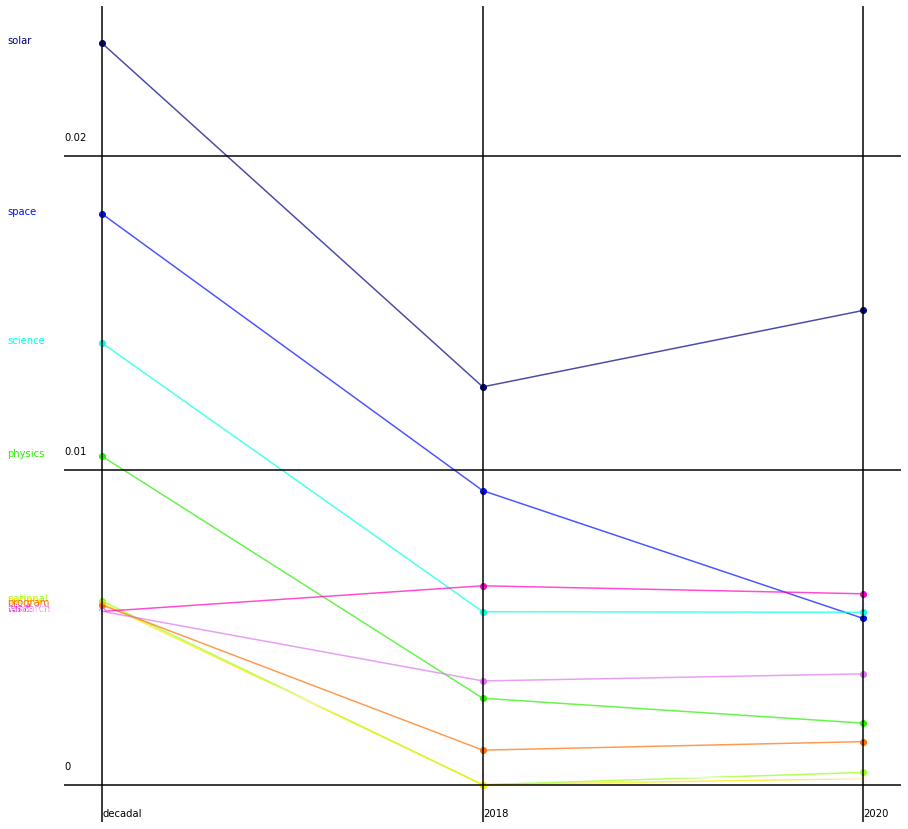

In [71]:
fig = plt.figure(figsize=(15,15))

num_words_to_plot = 10

jet= plt.get_cmap('gist_ncar')
colors = iter(jet(np.linspace(0,1,num_words_to_plot)))

for i in range(num_words_to_plot):
    c = next(colors)
    plt.scatter([0,1,2],
                [freq_evol['probability decadal'][i],freq_evol['probability year 2018'][i],freq_evol['probability year 2020'][i]],
                color=c)
    plt.plot([0,1,2],
             [freq_evol['probability decadal'][i],freq_evol['probability year 2018'][i],freq_evol['probability year 2020'][i]],
            linestyle='-',
            alpha=0.7,
            label = freq_evol['word'][i],
            color = c)
    plt.text(-0.25,freq_evol['probability decadal'][i], freq_evol['word'][i],color=c)
plt.axvline(x='decadal',c='k')
plt.text(0,-0.001,'decadal',c='k')
plt.axvline(x='2018',c='k')
plt.text(1,-0.001,'2018',c='k')
plt.axvline(x='2020',c='k')
plt.text(2,-0.001,'2020',c='k')

plt.axhline(y=0,c='k')
plt.text(-0.1,0.0005,'0',c='k')
plt.axhline(y=0.01,c='k')
plt.text(-0.1,0.0105,'0.01',c='k')
plt.axhline(y=0.02,c='k')
plt.text(-0.1,0.0205,'0.02',c='k')

plt.grid(True)
plt.axis('off')
# plt.legend()

In [33]:
tokens_2018.noun_chunks

In [74]:
[(t.text,t.lemma_) for t in tokens_2018]

[('\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n',
  '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n'),
 ('Heliophysics', 'Heliophysics'),
 ('-', '-'),
 ('Early', 'Early'),
 ('Career', 'Career'),
 ('Investigator', 'Investigator'),
 ('Program', 'Program'),
 ('\n\n', '\n\n'),
 ('Abstracts', 'abstract'),
 ('of', 'of'),
 ('Selected', 'Selected'),
 ('Proposals', 'Proposals'),
 ('\n', '\n'),
 ('(', '('),
 ('NNH18ZDA001N', 'NNH18ZDA001N'),
 ('-', '-'),
 ('ECIP', 'ECIP'),
 (')', ')'),
 ('\n\n \n', '\n\n \n'),
 ('Below', 'below'),
 ('are', 'be'),
 ('the', 'the'),
 ('abstracts', 'abstract'),
 ('of', 'of'),
 ('proposals', 'proposal'),
 ('selected', 'select'),
 ('for', 'for'),
 ('funding', 'funding'),
 ('for', 'for'),
 ('the', 'the'),
 ('Heliophysics', 'Heliophysics'),
 ('–', '–'),
 ('Early', 'Early'),
 ('Career', 'Career'),
 ('\n', 

In [27]:
tokens_2018
































































 
Heliophysics - Early Career Investigator Program 

Abstracts of Selected Proposals 
(NNH18ZDA001N-ECIP) 

 
Below are the abstracts of proposals selected for funding for the Heliophysics – Early Career 
Investigator Program. Principal Investigator (PI) name, institution, and proposal title are also 
included. 50 proposals were reviewed in response to this opportunity. On April 1, 2019, 11 
proposals were selected for funding.  

 
 

 
Haihong Che/University of Maryland, College Park  
Electron Heating and Plasma Emission in the Solar Corona  
 
Nanoflares heating has been recognized as an important process that contributes to the heating of 
the solar corona, particularly to electron heating in the lower corona. Similar to solar flares, 
nanoflares are also a type of impulsive magnetic reconnection (MR), typically with a strong 
guide field. It is still poorly understood how nearly collisionless MRs efficiently transform

In [24]:
features_2018 = extract_from_doc(tokens_2018)
features_2018

{'Heliophysics': 'PROPN',
 'Early': 'PROPN',
 'Career': 'PROPN',
 'Investigator': 'PROPN',
 'Program': 'PROPN',
 'abstract': 'NOUN',
 'Selected': 'PROPN',
 'Proposals': 'PROPN',
 'NNH18ZDA001N': 'PROPN',
 'ECIP': 'PROPN',
 'proposal': 'NOUN',
 'funding': 'NOUN',
 'Principal': 'PROPN',
 'PI': 'PROPN',
 'institution': 'NOUN',
 'title': 'NOUN',
 'response': 'NOUN',
 'opportunity': 'NOUN',
 'April': 'PROPN',
 'Haihong': 'PROPN',
 'Che': 'PROPN',
 'University': 'PROPN',
 'Maryland': 'PROPN',
 'College': 'PROPN',
 'Park': 'PROPN',
 'Electron': 'PROPN',
 'Heating': 'PROPN',
 'Plasma': 'PROPN',
 'Emission': 'PROPN',
 'Solar': 'PROPN',
 'Corona': 'PROPN',
 'Nanoflares': 'PROPN',
 'heating': 'NOUN',
 'process': 'NOUN',
 'corona': 'NOUN',
 'electron': 'NOUN',
 'flare': 'NOUN',
 'nanoflare': 'NOUN',
 'type': 'NOUN',
 'reconnection': 'NOUN',
 'MR': 'PROPN',
 'guide': 'NOUN',
 'field': 'NOUN',
 'collisionless': 'NOUN',
 'mr': 'NOUN',
 'energy': 'NOUN',
 'particle': 'NOUN',
 'power': 'NOUN',
 'law': 

In [23]:
def should_keep(w, desired_parts_of_speech):
    desiredPOS = w.pos_ in desired_parts_of_speech
    notStop = not w.is_stop
    notPerc = w.lemma_ not in ["%"]
    return desiredPOS and notStop and notPerc


def extract_from_doc(doc):
    """
    Extract features from a spacy doc.
    Args:
        doc (spacy.doc): a doc processed by the spacy 'en' model
    Returns:
        terms_tagged (dict): features with their respective tags
    Examples:
        >>> from dsconcept.model import extract_from_doc
        >>> import spacy
        >>> nlp = spacy.load('en_core_web_sm')
        >>> txt = "The ship hung in the sky much the same way bricks don't."
        >>> doc = nlp(txt)
        >>> features = extract_from_doc(doc)
        >>> features
        {'ship': 'NOUN',
         'sky': 'NOUN',
         'way': 'NOUN',
         'brick': 'NOUN',
         'the ship': 'NOUN_CHUNK'}
    """
    # TODO: change this function such that it processes better but maintains the same interface.
    terms_tagged = dict()

    desired_parts_of_speech = ["NOUN", "PROPN"]
    # Get any 1-gram terms which are not % signs, or stop words.
    terms = {w.lemma_: w.pos_ for w in doc if should_keep(w, desired_parts_of_speech)}
    terms_tagged.update(terms)

    # Lemmatize each gram and join with a space.
    noun_chunks = {
        " ".join([w.lemma_ for w in nc if not w.is_stop]): nc.label_
        for nc in doc.noun_chunks
    }
#     # filter our noun chunks that are already in terms set and not in excluded_list.
#     excluded_list = ["-PRON-", ""]
#     noun_chunks_filtered = {
#         w.strip(): "NOUN_CHUNK"
#         for w, lab in noun_chunks.items()
#         if (w not in terms.keys()) and (w not in excluded_list)
#     }
#     terms_tagged.update(noun_chunks_filtered)

#     # TODO: entities take precedence over noun chunks
#     # Get entities from text and remove collisions with terms and noun chunks.
#     ent_excluded_set = ["ORDINAL", "CARDINAL", "QUANTITY", "DATE", "PERCENT"]
#     ents = {e.lemma_: e.label_ for e in doc.ents if e.label_ not in ent_excluded_set}
#     ents_filtered = {
#         ent: "ENT"
#         for ent, lab in ents.items()
#         if ent not in terms.keys() and ent not in noun_chunks_filtered.keys()
#     }
#     terms_tagged.update(ents_filtered)

#     # Add acronyms which have definitions.
#     # These acronyms could create Noise if they are not good. Maybe better to use their definitions.
#     # This schema will only pull out identifical definitions. No lemmatizing, no fuzzy matching.
#     # TODO: add lemmatizing and fuzzy matching for acrnoyms. This code exists in acronyms project.
#     acronyms_with_defs = acronyms_and_definitions(doc)
#     acronyms_filtered = {
#         "{} - {}".format(ac, definition): "ACRONYM"
#         for ac, definition in acronyms_with_defs.items()
#         if definition != ""
#     }
#     terms_tagged.update(acronyms_filtered)

    return terms_tagged